---
## Step 0. Before starting
### 0-1. Update R
1. Download binaries (Run R-3.X.X-win.exe) from https://www.r-project.org/.
2. Run R-3.X.X-win.exe
3. Set system path.
    - Type "env" in the Start button and select "Edit the system environment variables".
    - Push "Environment Variables..." button.
    - Change "Path" variable.
4. Install IRkernel for Jupyter
    - in Anaconda prompt (Admin)
    ```
    > R
    > install.packages('IRkernel')
    > IRkernel::installspec()
    ```
    
### 0-2. How to nstall packages
**Only for the first installation**, open command window.<BR>
**\<on Win10\ as regular user>**
```
C:\Users\User>R
> install.packages("ggpubr")
```
It will ask if you want to create personal for installation. Answer with **"yes"**. Once you do so, you can install additional packages from Jupyter.

**\<on Ubuntu\>**
```
$ sudo R
> install.packages("ggpubr")
```

**\<using Jupyter\>**

In [1]:
install.packages("magrittr")

Installing package into 'C:/Users/wataru/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'magrittr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\wataru\AppData\Local\Temp\RtmpSqc3wI\downloaded_packages


### 0-3. Useful packages
- **ggpubr**: 'ggplot2' Based Publication Ready Plots<BR>
https://cran.r-project.org/web/packages/ggpubr/index.html<BR>
- **magrittr**: It provides a new **“pipe”-like operator**, %>%<BR>
https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html    
- **stringr**: Simple, Consistent Wrappers for **Common String Operations**<BR>
https://www.rdocumentation.org/packages/stringr/versions/1.4.0<BR>
    used as `for (colname in str_subset(names(df), rex)){` in the function conv_str2list().
- **hablar**: Simple tools for **converting columns to new data types**. Intuitive functions for columns with missing values.<BR>
https://cran.r-project.org/web/packages/hablar/<BR>
    used as `convert(lgl(single_animal))`.
- **dplyre**: dplyr is a grammar of data manipulation, providing a consistent set of verbs that help you solve the most common data manipulation challenges.<BR>
https://dplyr.tidyverse.org/<BR>
    used as `not yet`.

### 0-4. Check R version

In [ ]:
version

---
## Step 1. Package preparation
### 1-1. Install packages

In [217]:
# Install packages

install.packages("magrittr")
install.packages("hablar")
install.packages("ggbeeswarm")
install.packages("tidyverse")
# install.packages("dplyr")
# install.packages("stringr")
install.packages("Rmisc")
install.packages("e1071")

Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'magrittr' is in use and will not be installed"
Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'hablar' is in use and will not be installed"
Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'ggbeeswarm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpCIgXah\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'tidyverse' is in use and will not be installed"
Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'Rmisc' is in use and will not be installed"
Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'e1071' is in use and will not be installed"
Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'googleVis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpCIgXah\downloaded_packages


### 1-2. Load libraries

In [218]:
# Load required library
library(Rmisc)
library(hablar)
library(tidyverse)
# library(dplyr)

path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "synchro_freeze.R"
filename = file.path(path, base)
source(filename)

library(magrittr)
library(ggplot2)
library(ggpubr) # ggplot2 based publication ready plots

#library(Rmisc)

Creating a generic function for 'toJSON' from package 'jsonlite' in package 'googleVis'


Welcome to googleVis version 0.6.4

Please read Google's Terms of Use
before you start using the package:
https://developers.google.com/terms/

Note, the plot method of googleVis will by default use
the standard browser to display its output.

See the googleVis package vignettes for more details,
or visit https://github.com/mages/googleVis.

To suppress this message use:
suppressPackageStartupMessages(library(googleVis))




---
## Step 2. Import CSV file and save as R data frame

In [210]:
#######################################
# Load the big table into t1
# R accepts both ways to describe path.
# filename <- "C:\\Users\\User\\Desktop\\project\\summary3.csv"

path = "Z:/videos_synchrony"
base = "summary3.csv"
filename = file.path(path, base)
t1 = read.table(file=filename,header=TRUE, sep=",")
t1 = t1 %>% convert(lgl(single_animal))

# Load groups table into t2
base = "IVs.csv"
filename = file.path(path, base)
t2 = read.table(file=filename,header=TRUE, sep=",")
t2 = t2 %>% convert(lgl(single_animal))

#######################################
# merge two data frames by IDs
df <- merge(t2, t1, by=c("folder_videoname","single_animal"))
# rename of column names may be necessary
#names(df)[names(df) == "single_animal.x"] <- "single_animal"

#######################################
# Post process
# Convert strings to integer list
rex = "fz_start*|fz_end*|lagt_*"
df = conv_str2list(df, rex)

# Adjust dtype
df = df %>% convert(chr(folder_videoname,sex,familiarity,lighting,stress,comment,infusion_hpc,infusion_pfc))

# Set NA for empty cell
df[df==""]<-NA
# df[is.nan(df)] <- NA

#######################################
# Exclude records
cat("Exclude", nrow(df[df$exclude==TRUE,]), "records from", nrow(df), "records\n")
df = df[df$exclude!=TRUE,]
cat("Remaining records are", nrow(df), "\n")

#######################################
# convert tibble to data.frame
df = as.data.frame(df)

#######################################
# Display summary
dis_summary(df)

# if(which(df$single_animal.x != df$single_animal.y) == FALSE){
#     print("folder_videoname and single_animal are consistent.")
# } else {
#     print("something is wrong")
# }

#######################################
# Save DF
# You can open from RStudio
base = "data.Rda"
filename = file.path(path, base)
save(df, file=filename)

path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data.Rda"
filename = file.path(path, base)
save(df, file=filename)


Exclude 46 records from 184 records
Remaining records are 138 
dimension:  138 24 
folder_videoname    single_animal              sex              age 
     "character"        "logical"      "character"        "integer" 
    infusion_hpc     infusion_pfc      familiarity         lighting 
     "character"      "character"      "character"      "character" 
       partition           stress          comment          exclude 
       "logical"      "character"      "character"        "logical" 
         fz_sub1          fz_sub2       fz_overlap          cohen_d 
       "numeric"        "numeric"        "numeric"        "numeric" 
   fz_start_sub1      fz_end_sub1    fz_start_sub2      fz_end_sub2 
          "list"           "list"           "list"           "list" 
lagt_start_s1_s2 lagt_start_s2_s1   lagt_end_s1_s2   lagt_end_s2_s1 
          "list"           "list"           "list"           "list" 


,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,18.95833,0.7139131,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19"
2,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,22.08333,1.5590576,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8"


---
## Step 3. Sex and stress effects on synchronization
**Load R dataframe**

In [5]:
# Load DF
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data.Rda"
filename = file.path(path, base)
load(file=filename)

#######################################
# Display summary
dis_summary(df)

dimension:  138 24 
folder_videoname    single_animal              sex              age 
     "character"        "logical"      "character"        "integer" 
    infusion_hpc     infusion_pfc      familiarity         lighting 
     "character"      "character"      "character"      "character" 
       partition           stress          comment          exclude 
       "logical"      "character"      "character"        "logical" 
         fz_sub1          fz_sub2       fz_overlap          cohen_d 
       "numeric"        "numeric"        "numeric"        "numeric" 
   fz_start_sub1      fz_end_sub1    fz_start_sub2      fz_end_sub2 
          "list"           "list"           "list"           "list" 
lagt_start_s1_s2 lagt_start_s2_s1   lagt_end_s1_s2   lagt_end_s2_s1 
          "list"           "list"           "list"           "list" 


,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,18.95833,0.7139131,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19"
2,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,22.08333,1.5590576,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8"


**Exclude single animal, infusion, lighting and partition experiments**<BR>
It's good to check using the data frame viewer in RStudio.

In [6]:
df.set1 <- subset(df, 
                  single_animal==FALSE & 
                  is.na(infusion_hpc) &
                  is.na(infusion_pfc) & 
                  familiarity=='familiar' &
                  lighting =='visible' & 
                  partition==FALSE &
                  exclude==FALSE)

#######################################
# Display summary
dis_summary(df.set1)

dimension:  57 24 
folder_videoname    single_animal              sex              age 
     "character"        "logical"      "character"        "integer" 
    infusion_hpc     infusion_pfc      familiarity         lighting 
     "character"      "character"      "character"      "character" 
       partition           stress          comment          exclude 
       "logical"      "character"      "character"        "logical" 
         fz_sub1          fz_sub2       fz_overlap          cohen_d 
       "numeric"        "numeric"        "numeric"        "numeric" 
   fz_start_sub1      fz_end_sub1    fz_start_sub2      fz_end_sub2 
          "list"           "list"           "list"           "list" 
lagt_start_s1_s2 lagt_start_s2_s1   lagt_end_s1_s2   lagt_end_s2_s1 
          "list"           "list"           "list"           "list" 


,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,18.95833,0.7139131,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19"
2,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,22.08333,1.5590576,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8"


**Change order of individual variables**<BR>
    Explicitly set the order in individual valiables

In [7]:
df.set1 <- within(df.set1, sex <- factor(sex, levels = c("male","female")))
df.set1 <- within(df.set1, stress <- factor(stress, levels = c("no_stress","stress")))

**Plot Cohen D with SEM errorbar from familiar male and female pairs**<BR>
Remaining independent variables are sex, familiarity and stress.

- **ggplot2 dot plot : Quick start guide - R software and data visualization**<BR>
http://www.sthda.com/english/wiki/ggplot2-dot-plot-quick-start-guide-r-software-and-data-visualization

- **Multiple graphs on one page (ggplot2)**<BR>
http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
- **ggplot2 まとめ: 初歩から程よいレベルまで (in Japanese)**<BR>
https://mrunadon.github.io/images/geom_kazutanR.html 
- **Beautiful plotting in R: A ggplot2 cheatsheet**<BR>
http://zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/
- **Complete themes**<BR>
    https://ggplot2.tidyverse.org/reference/ggtheme.html
- **Resizing plots in the R kernel for Jupyter notebooks**<BR>
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html        
- **GGPLOT LEGEND TITLE, POSITION AND LABELS**<BR>
 https://www.datanovia.com/en/blog/ggplot-legend-title-position-and-labels/   
- **Arrange Multiple ggplots**<BR>
    https://rpkgs.datanovia.com/ggpubr/reference/ggarrange.html
    
Other decoration for plots not used below

    # Gray plot
    # scale_fill_grey() + theme_classic()+
    # add error bar in SD
    # stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="errorbar", color="red", width=0.2)+
    # add mean red point
    # stat_summary(fun=mean, geom="point", color="red")

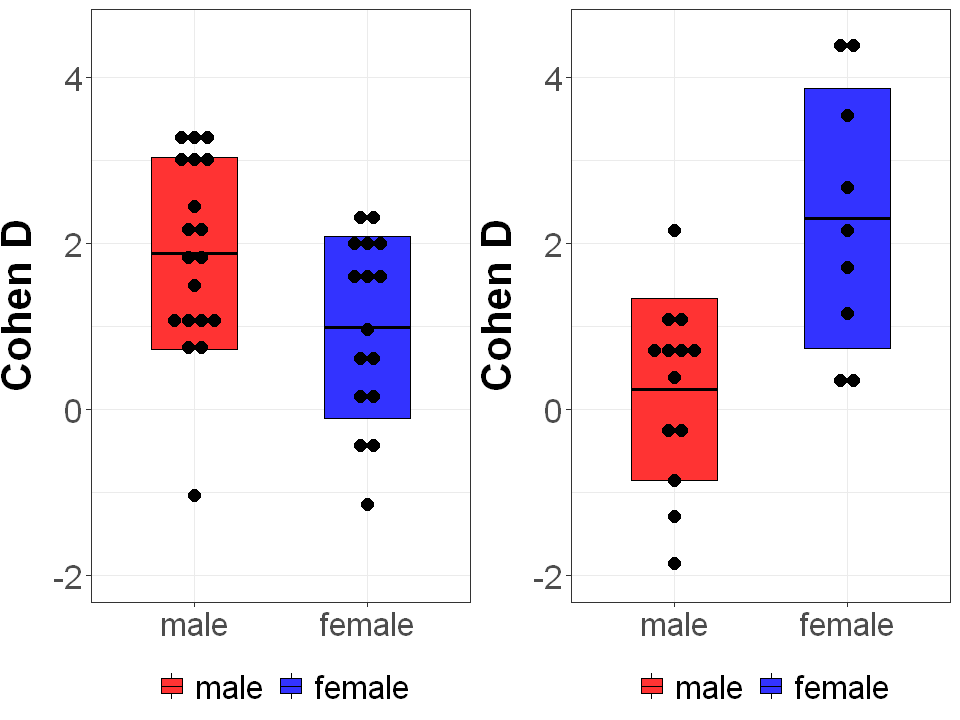

In [190]:
box_plot <- function(df.input, x1_col_label, y_col_label, x2_col_label, x2_col_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x hight
#     plot_width = 8
#     plot_hight = 6

    # dotplot
    dp_binwidth=0.2
    dp_dotsize=0.8
    
    # y limits
    ylim1 = -2
    ylim2 = 4.5
    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col_label)]
    x2 <- names(df.input)[which (colnames(df.input)==x2_col_label)]
    y <- names(df.input)[which (colnames(df.input)==y_col_label)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_hight)

    # set data frame and axes
    ggp.output <- ggplot(df.input[df.input[,x2]==x2_col_value,], aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

out1_1 = box_plot(df.set1, "sex","cohen_d", "stress", "no_stress","Cohen D")
out1_2 = box_plot(df.set1, "sex","cohen_d", "stress", "stress","Cohen D")

# plot the two plots
# set the size of final plot, width x hight
plot_width = 8
plot_hight = 6
options(repr.plot.width=plot_width, repr.plot.height=plot_hight)

ggarrange(out1_1, out1_2, ncol=2)

**Export the plot as an eps file**

In [185]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**1-sample t-test**
- R - Mean, Median and Mode
https://www.tutorialspoint.com/r/r_mean_median_mode.htm

- 13.3 T-test: t.test()
https://bookdown.org/ndphillips/YaRrr/t-test-t-test.html
    


In [26]:
one_sample_t_test <- function(df.input, y_col, x1_col, x1_value, x2_col, x2_value){
#############################################################
# 1 sample t-test for (y_col), where
#     (x1_col) = x1_value
#     (x2_col) = x2_value
# hypothetical value (mu = 0)
#############################################################
    # get index for each column name
    #    you can use either forms work
#     x1 <- which (colnames(df.input)==x1_col)
#     x2 <- which (colnames(df.input)==x2_col)
#     y <- which (colnames(df.input)==y_col)
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==x2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame to vector
    temp = df.input[,y][df.input[,x1]==x1_value & df.input[,x2]==x2_value]
    
    cat(paste0('### (',x1_value,", \t",x2_value, ") \t###\t"))
    temp.test <- t.test(temp, mu=0)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    # print(temp.test)

    return(temp.test)
}
for (sex in c("male","female")){
    for (stress in c("stress", "no_stress")){
        temp = one_sample_t_test(df.set1,"cohen_d", "sex",sex,"stress",stress)
    }
}


### (male, 	stress) 	###	p-value:  0.4516441 
### (male, 	no_stress) 	###	p-value:  1.330275e-06 
### (female, 	stress) 	###	p-value:  0.002286738 
### (female, 	no_stress) 	###	p-value:  0.002503648 


**2-sample t-test**

In [27]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)

    return(temp.test)
}

for (sex1 in c("male", "female")){
    for (sex2 in c("male", "female")){
        for (stress1 in c("stress","no_stress")){
            for (stress2 in c("stress","no_stress")){
                temp = two_sample_t_test(df.set1, "cohen_d","sex",sex1,"stress",stress1,"sex",sex2,"stress",stress2)
}}}}




### (male, 	stress) 	vs. (male, 	stress) 	###	p-value:  1 
### (male, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  0.0003759046 
### (male, 	no_stress) 	vs. (male, 	stress) 	###	p-value:  0.0003759046 
### (male, 	no_stress) 	vs. (male, 	no_stress) 	###	p-value:  1 
### (male, 	stress) 	vs. (female, 	stress) 	###	p-value:  0.004484551 
### (male, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.07732758 
### (male, 	no_stress) 	vs. (female, 	stress) 	###	p-value:  0.4810803 
### (male, 	no_stress) 	vs. (female, 	no_stress) 	###	p-value:  0.02584317 
### (female, 	stress) 	vs. (male, 	stress) 	###	p-value:  0.004484551 
### (female, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  0.4810803 
### (female, 	no_stress) 	vs. (male, 	stress) 	###	p-value:  0.07732758 
### (female, 	no_stress) 	vs. (male, 	no_stress) 	###	p-value:  0.02584317 
### (female, 	stress) 	vs. (female, 	stress) 	###	p-value:  1 
### (female, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.04508847 
### (fem

---
## Step 4. Sex and stress effects on freezing
**collapse sub1 and sub2 freezing into the same column with cohen_d**

In [150]:
# Create data frame
df.freeze = data.frame(sex=character(),stress=character(),freeze=double(),cohen_d=double())

for (sex in c("male", "female")){
    for (stress in c("stress","no_stress")){
        # Append rows from onset
        df.freeze = df.freeze %>% add_row(
            "freeze" = unlist(df.set1['fz_sub1'][df.set1$sex==sex & df.set1$stress==stress,]),
            "cohen_d" = unlist(df.set1['cohen_d'][df.set1$sex==sex & df.set1$stress==stress,]),
            "sex" = sex, "stress" = stress)
    }
}

for (sex in c("male", "female")){
    for (stress in c("stress","no_stress")){
        # Append rows from onset
        df.freeze = df.freeze %>% add_row(
            "freeze" = unlist(df.set1['fz_sub2'][df.set1$sex==sex & df.set1$stress==stress,]),
            "cohen_d" = unlist(df.set1['cohen_d'][df.set1$sex==sex & df.set1$stress==stress,]),
            "sex" = sex, "stress" = stress)
    }
}


# Explicitly set the order in individual valiables
df.freeze <- within(df.freeze, sex <- factor(sex, levels = c("male","female")))
df.freeze <- within(df.freeze, stress <- factor(stress, levels = c("no_stress","stress")))

#######################################
# Display summary
dis_summary(df.freeze)

dimension:  114 4 
      sex    stress    freeze   cohen_d 
 "factor"  "factor" "numeric" "numeric" 


,sex,stress,freeze,cohen_d
,<fct>,<fct>,<dbl>,<dbl>
1,male,stress,12.91667,0.6215140
2,male,stress,50.20833,0.8000654


**plot the graphs**

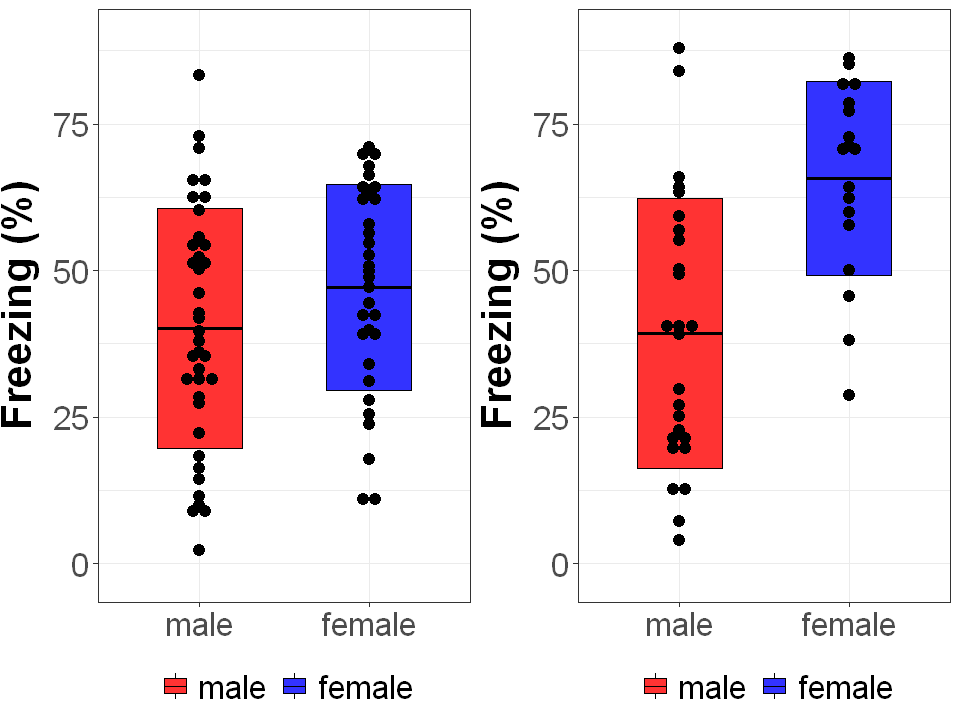

In [191]:
box_plot <- function(df.input, x1_col_label, y_col_label, x2_col_label, x2_col_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x hight
#     plot_width = 8
#     plot_hight = 6

    # dotplot
    dp_binwidth=0.7
    dp_dotsize=3
    
    # y limits
    ylim1 = -2
    ylim2 = 90
    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col_label)]
    x2 <- names(df.input)[which (colnames(df.input)==x2_col_label)]
    y <- names(df.input)[which (colnames(df.input)==y_col_label)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_hight)

    # set data frame and axes
    ggp.output <- ggplot(df.input[df.input[,x2]==x2_col_value,], aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

out2_1 = box_plot(df.freeze, "sex","freeze", "stress", "no_stress","Freezing (%)")
out2_2 = box_plot(df.freeze, "sex","freeze", "stress", "stress","Freezing (%)")

# plot the two plots
# set the size of final plot, width x hight
plot_width = 8
plot_hight = 6
options(repr.plot.width=plot_width, repr.plot.height=plot_hight)

ggarrange(out2_1, out2_2, ncol=2)

**Export the plot as an eps file**

In [185]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**2-sample t-test**

In [28]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)
    
    return(temp.test)
}

for (sex1 in c("male", "female")){
    for (sex2 in c("male", "female")){
        for (stress1 in c("stress","no_stress")){
            for (stress2 in c("stress","no_stress")){
                temp = two_sample_t_test(df.freeze, "freeze","sex",sex1,"stress",stress1,"sex",sex2,"stress",stress2)
}}}}


### (male, 	stress) 	vs. (male, 	stress) 	###	p-value:  1 
### (male, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  0.8784575 
### (male, 	no_stress) 	vs. (male, 	stress) 	###	p-value:  0.8784575 
### (male, 	no_stress) 	vs. (male, 	no_stress) 	###	p-value:  1 
### (male, 	stress) 	vs. (female, 	stress) 	###	p-value:  6.380139e-05 
### (male, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.1573208 
### (male, 	no_stress) 	vs. (female, 	stress) 	###	p-value:  1.100067e-05 
### (male, 	no_stress) 	vs. (female, 	no_stress) 	###	p-value:  0.1273043 
### (female, 	stress) 	vs. (male, 	stress) 	###	p-value:  6.380139e-05 
### (female, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  1.100067e-05 
### (female, 	no_stress) 	vs. (male, 	stress) 	###	p-value:  0.1573208 
### (female, 	no_stress) 	vs. (male, 	no_stress) 	###	p-value:  0.1273043 
### (female, 	stress) 	vs. (female, 	stress) 	###	p-value:  1 
### (female, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.0006153701 
### (fem

---
**Examine the output from 2-sample t-test**<BR>
The class of output is 'htest', and complecated!

In [72]:
# temp is the output from the previous cell
# print out the test
temp
# list variable names in the temp
names(temp)
# print lass of the temp output
class(temp)
# stracture of the temp output
str(temp)
# summary of variables of the temp output
summary(temp)


	Welch Two Sample t-test

data:  temp.a and temp.b
t = 0, df = 62, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.758504  8.758504
sample estimates:
mean of x mean of y 
 47.08984  47.08984 


[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

[1] "htest"

List of 10
 $ statistic  : Named num 0
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 62
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1
 $ conf.int   : num [1:2] -8.76 8.76
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 47.1 47.1
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 4.38
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "temp.a and temp.b"
 - attr(*, "class")= chr "htest"


            Length Class  Mode     
statistic   1      -none- numeric  
parameter   1      -none- numeric  
p.value     1      -none- numeric  
conf.int    2      -none- numeric  
estimate    2      -none- numeric  
null.value  1      -none- numeric  
stderr      1      -none- numeric  
alternative 1      -none- character
method      1      -none- character
data.name   1      -none- character

**Naking the output**<BR>
    Output is a list of multiple lists

In [75]:
# Show the content of parameter
temp['parameter']
temp[2]

# Extract the inside list
temp[['parameter']]
temp[[2]]
temp$parameter

# Show the content of "df" value in the inside list
temp[['parameter']]['df']
temp[[2]][1]

# Extract value from the 
temp[['parameter']][['df']]
temp[[2]][[1]]

$parameter
 df df1 
 62   1

$parameter
 df df1 
 62   1

df df1 
 62   1

df df1 
 62   1

df df1 
 62   1

df 
62

df 
62

[1] 62

[1] 62

**You can even add new value**

In [76]:
temp[['parameter']]['df1'] = 1

---
## Summary graphs

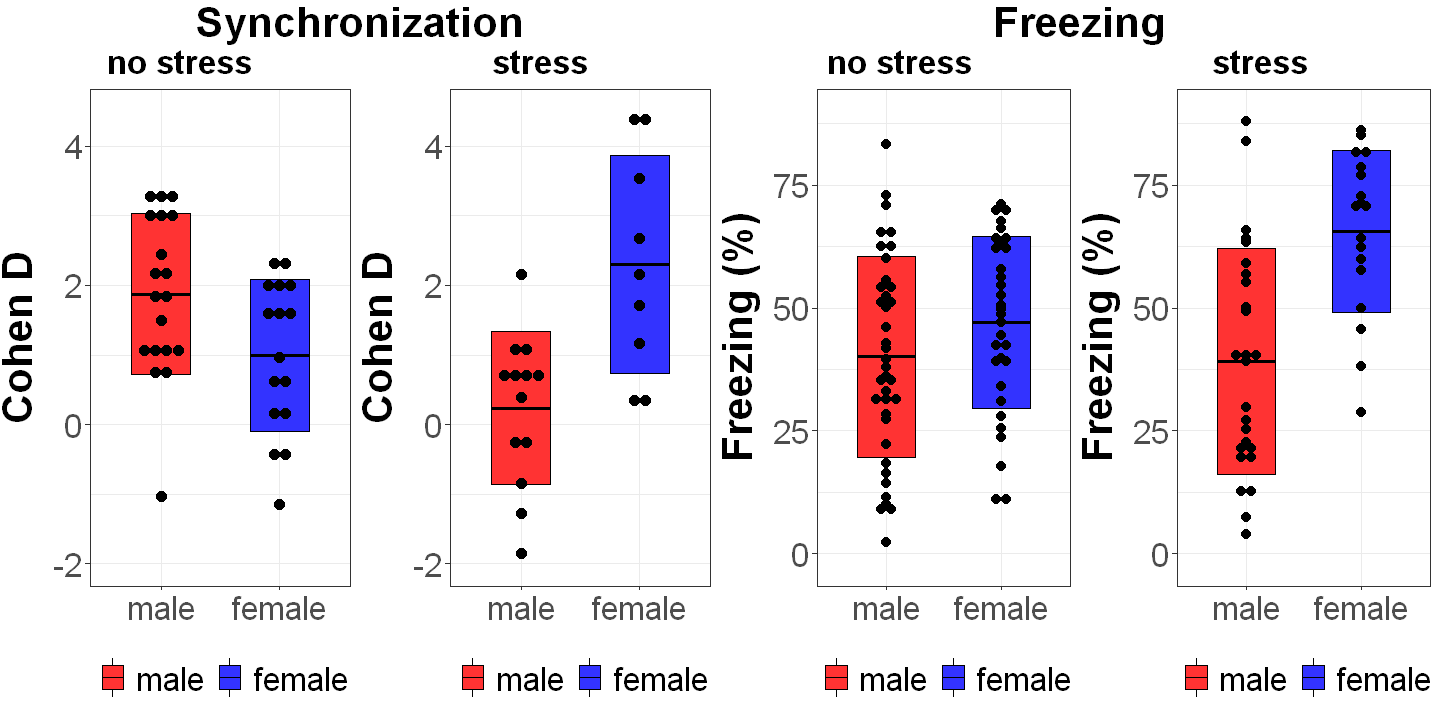

In [193]:
# set the size of final plot
plot_height = 6
plot_width = 12
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

out1_1a = annotate_figure(out1_1,top = text_grob("no stress", face = "bold", size = 20))
out1_2a = annotate_figure(out1_2,top = text_grob("stress", face = "bold", size = 20))
out2_1a = annotate_figure(out2_1,top = text_grob("no stress", face = "bold", size = 20))
out2_2a = annotate_figure(out2_2,top = text_grob("stress", face = "bold", size = 20))

b1 = ggarrange(out1_1a, out1_2a, ncol=2)
b1 = annotate_figure(b1,top = text_grob("Synchronization", face = "bold", size = 25))
b2 = ggarrange(out2_1a, out2_2a, ncol=2)
b2 = annotate_figure(b2,top = text_grob("Freezing", face = "bold", size = 25))

ggarrange(b1, b2, ncol=2)

**Export the plot as an eps file**

In [194]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**Two-way ANOVA test**

In [204]:
temp.aov = aov(cohen_d ~ freeze + stress, data = df.freeze)
summary(temp.aov)

temp.aov = aov(cohen_d ~ freeze + stress, data = df.freeze[df.freeze$sex == "male",])
summary(temp.aov)

temp.aov = aov(cohen_d ~ freeze + stress, data = df.freeze[df.freeze$sex == "female",])
summary(temp.aov)

             Df Sum Sq Mean Sq F value Pr(>F)  
freeze        1    9.0   9.001   4.997 0.0274 *
stress        1    6.3   6.301   3.498 0.0641 .
Residuals   111  199.9   1.801                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
freeze       1   0.00    0.00    0.00    0.992    
stress       1  41.53   41.53   32.95 3.18e-07 ***
Residuals   61  76.87    1.26                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
freeze       1  18.96  18.957  12.989 0.000755 ***
stress       1   7.51   7.505   5.142 0.027986 *  
Residuals   47  68.59   1.459                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

---
## Step 5. Correlation between freezing levels and synchronization
**plot the scatter plot**

In [82]:
scatter_plot <- function(df.input, x1_col, y_col, x2_col, x3_col, x3_value, xaxis_label, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x hight
    plot_width = 8
    plot_hight = 6

    # dotplot
#     dp_binwidth=0.7
#     dp_dotsize=3
   
    point_size = 3
    
    
    # y limits
    ylim1 = -3
    ylim2 = 5
    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==x2_col)]
    x3 <- names(df.input)[which (colnames(df.input)==x3_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]

    # set the size of final plot
    options(repr.plot.width=plot_width, repr.plot.height=plot_hight)
        
    ggplot(df.input[df.input[,x3]==x3_value,], aes_string(x=x1,y=y,fill=x2,color=x2))+
        geom_point(size=point_size)+
        geom_point(size=point_size,shape=1,colour="black")+
        geom_smooth(method=lm)+

        # x axis label
        labs(x=xaxis_label)+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        scale_colour_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            # axis.title.x = element_blank(),
            axis.title = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))

}


out3_1 = scatter_plot(df.freeze, "freeze", "cohen_d", "stress", "sex","male", "Freezeing (%)", "Cohen D")
out3_2 = scatter_plot(df.freeze, "freeze", "cohen_d", "stress", "sex","female", "Freezeing (%)", "Cohen D")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



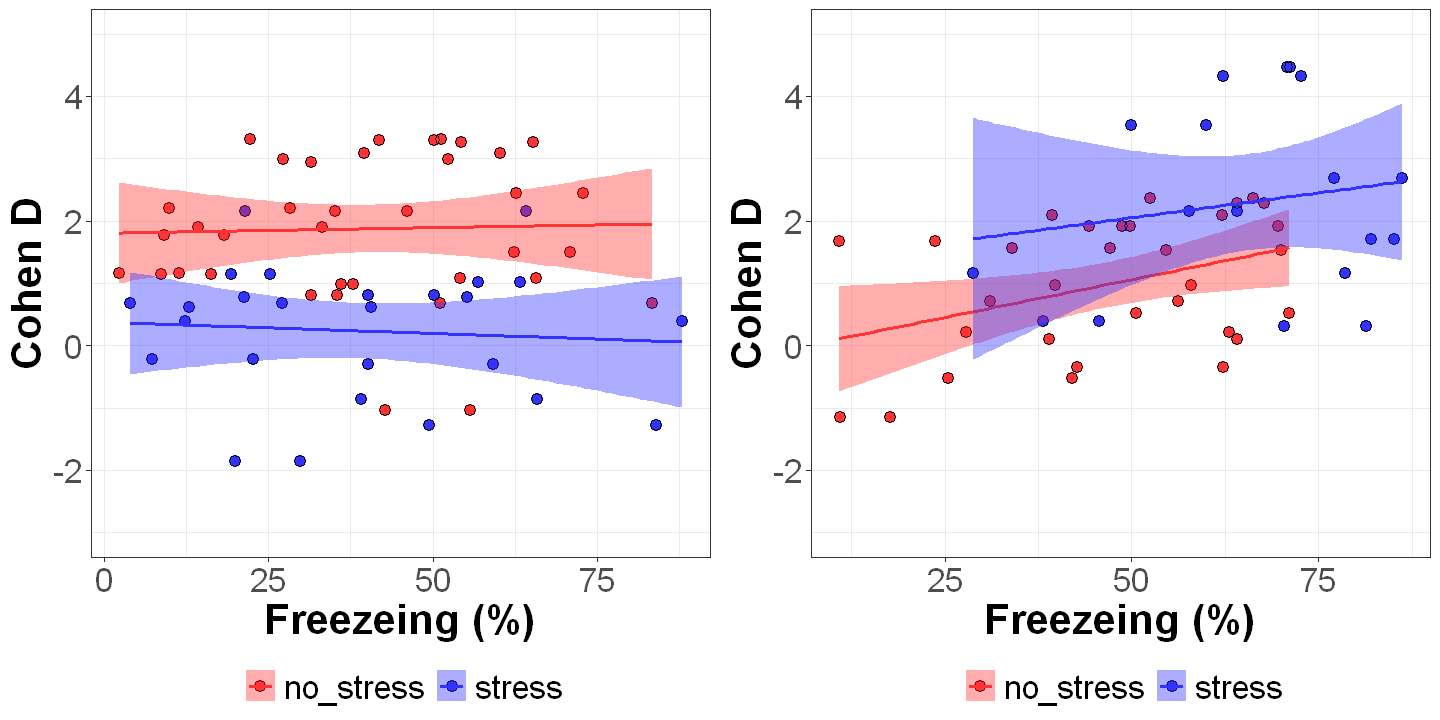

In [195]:
plot_height = 6
plot_width = 12
# set the size of final plot
options(repr.plot.width=plot_width, repr.plot.height=plot_height)
ggarrange(out3_1, out3_2, ncol=2)

**Export the plot as an eps file**

In [196]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

In [207]:
my_data <- read.csv(file.choose())

ERROR: Error in file.choose(): file choice cancelled


**Linear Regression**<BR>
http://r-statistics.co/Linear-Regression.html

- **Correlation:**
Correlation is a statistical measure that suggests the level of linear dependence between two variables, that occur in pair – just like what we have here in speed and dist. Correlation can take values between -1 to +1. If we observe for every instance where speed increases, the distance also increases along with it, then there is a high positive correlation between them and therefore the correlation between them will be closer to 1. The opposite is true for an inverse relationship, in which case, the correlation between the variables will be close to -1.

A value closer to 0 suggests a weak relationship between the variables. **A low correlation (-0.2 < x < 0.2)** probably suggests that much of variation of the response variable (Y) is unexplained by the predictor (X), in which case, we should probably look for better explanatory variables.

- **The linear correlation coefficient (Pearson’s r)** is just the standardized slope of a simple linear regression line.<BR>
    https://sebastianraschka.com/faq/docs/pearson-r-vs-linear-regr.html
    

**Test the entire data**

In [215]:
# Less correlation in the entirly collapsed data set

# calculate correlation between freeze and cohen_d
cat("Correlation: ",cor(df.freeze$freeze, df.freeze$cohen_d),"\n")

# Modeling the linear model
temp.linearmod = lm(cohen_d ~ freeze, data=df.freeze)

# Details
temp.summary = summary(temp.linearmod)
print(temp.summary)

Correlation:  0.2044988 

Call:
lm(formula = cohen_d ~ freeze, data = df.freeze)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1031 -0.8513 -0.0615  0.8311  2.8168 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.719459   0.300071   2.398   0.0182 *
freeze      0.013095   0.005923   2.211   0.0291 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.357 on 112 degrees of freedom
Multiple R-squared:  0.04182,	Adjusted R-squared:  0.03326 
F-statistic: 4.888 on 1 and 112 DF,  p-value: 0.02907



**It looks like the following perason command is the digest version**

In [214]:
cor.test(df.freeze$freeze, df.freeze$cohen_d, method = 'pearson')


	Pearson's product-moment correlation

data:  df.freeze$freeze and df.freeze$cohen_d
t = 2.2109, df = 112, p-value = 0.02907
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0213884 0.3743347
sample estimates:
      cor 
0.2044988 


**Test each group**
- R Tip: How to Pass a formula to lm**<BR>
http://www.win-vector.com/blog/2018/09/r-tip-how-to-pass-a-formula-to-lm/

In [140]:
# Effects of sex and stress on the correlation

comp_cor <- function(df.input, pred_col, resp_col, lim1_col, lim1_value, lim2_col, lim2_value){
    
    # get column name
    pred_col <- names(df.input)[which (colnames(df.input)==pred_col)]
    resp_col <- names(df.input)[which (colnames(df.input)==resp_col)]
    lim1_col <- names(df.input)[which (colnames(df.input)==lim1_col)]
    lim2_col <- names(df.input)[which (colnames(df.input)==lim2_col)]    

    # Extract data frame
    temp = df.input[df.input[,lim1_col]==lim1_value & df.input[,lim2_col]==lim2_value,]
    
    # compute correlations
    temp.cor = cor(temp[,pred_col], temp[,resp_col])
    
    # estimate the linear model
    # create formula to fit
    f = paste(resp_col, pred_col, sep = " ~ ")
    #cat("formula: ", f, ", ")
    
    # create model based on the created formula
    temp.linearmod = lm(f, data=temp)
    temp.summary = summary(temp.linearmod)
    
    # output in brief
    cat(paste0('### (',lim1_value,", ",lim2_value, ") ###, "))
    cat("correlation: ", temp.cor, ", ")
    cat("intercept_p-value: ", temp.summary[['coefficients']]['(Intercept)','Pr(>|t|)'], ", ")
    cat("freeze_p-value: ", temp.summary[['coefficients']]['freeze','Pr(>|t|)'], "\n")

    # output full
#     cat("correlation: ", temp.cor, "\n")
#     cat("formula: ", f, "\n")
#     print(temp.summary)
    
    temp.list = list("cor"=temp.cor, "f"=f, "linearmod"=temp.linearmod, "summary"=temp.summary)
    return(temp.list)
}
    
for (sex1 in c("male", "female")){
        for (stress1 in c("stress","no_stress")){
                temp = comp_cor(df.freeze, "freeze","cohen_d","sex",sex1,"stress",stress1)
}}

### (male, stress) ###, correlation:  -0.07698401 , intercept_p-value:  0.3883526 , freeze_p-value:  0.7085585 
### (male, no_stress) ###, correlation:  0.03197357 , intercept_p-value:  0.0001103961 , freeze_p-value:  0.8488681 
### (female, stress) ###, correlation:  0.1727324 , intercept_p-value:  0.4261761 , freeze_p-value:  0.4930851 
### (female, no_stress) ###, correlation:  0.3958904 , intercept_p-value:  0.767819 , freeze_p-value:  0.02490167 


---
## 2. Visualize the distribution of lagtime for onset and offset of freezing
### 2-1. Collapse the all cells in lagt_* columns and create a new DF of two columns (lagtime, type)

In [4]:
# Create working df and collapse cells in columns of "lagt_*"
rex = "lagt_*"

# Initialize dataframe
df.work = data.frame(matrix(ncol = 4, nrow = 1))
colnames(df.work) = str_subset(names(df), rex)

# Collapse each column
for (colname in str_subset(names(df), rex)){
    w = c() # working vector
    for (i in c(1:nrow(df))){
        # w = c(w, as.integer(unlist(df[i,colname])))
        w = c(w, unlist(df[i,colname]))
    }
    df.work[[1,colname]] = list(w)
}

# Mearge both directions, s1_s2 and s2_s1
for (colname in c("lagt_start", "lagt_end")){
    df.work[,colname] = NA # Append empty column
    # w = c(as.integer(unlist(df.work[1, paste0(colname, "_s1_s2")])),as.integer(unlist(df.work[1,paste0(colname, "_s2_s1")])))
    w = c(unlist(df.work[1, paste0(colname, "_s1_s2")]),unlist(df.work[1,paste0(colname, "_s2_s1")]))
    df.work[[1,colname]]=list(w)
}

# Create New DF, df.test of lagtime and type (onset or offset)
df.lagtime = data.frame("lagtime" = unlist(df.work[1,"lagt_start"]), "type" = "onset")
# Append rows from onset
df.lagtime = df.lagtime %>% add_row("lagtime" = unlist(df.work[1,"lagt_end"]), "type" = "offset")

# convert frame number to sec
df.lagtime[,"lagtime"] = df.lagtime[,"lagtime"] / 4

### 2-2. Visualize

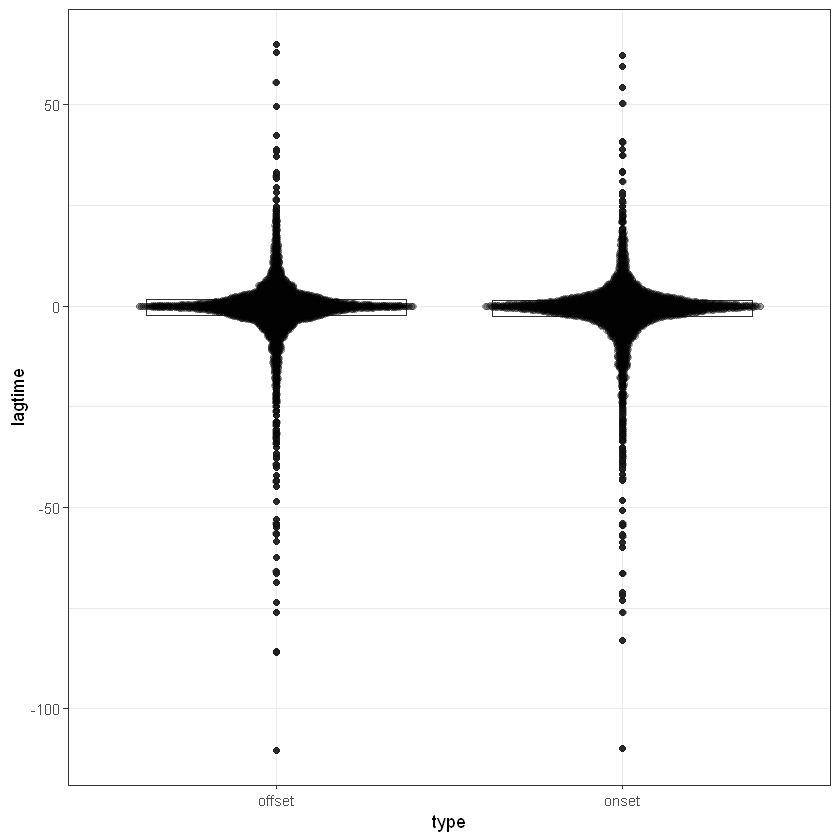

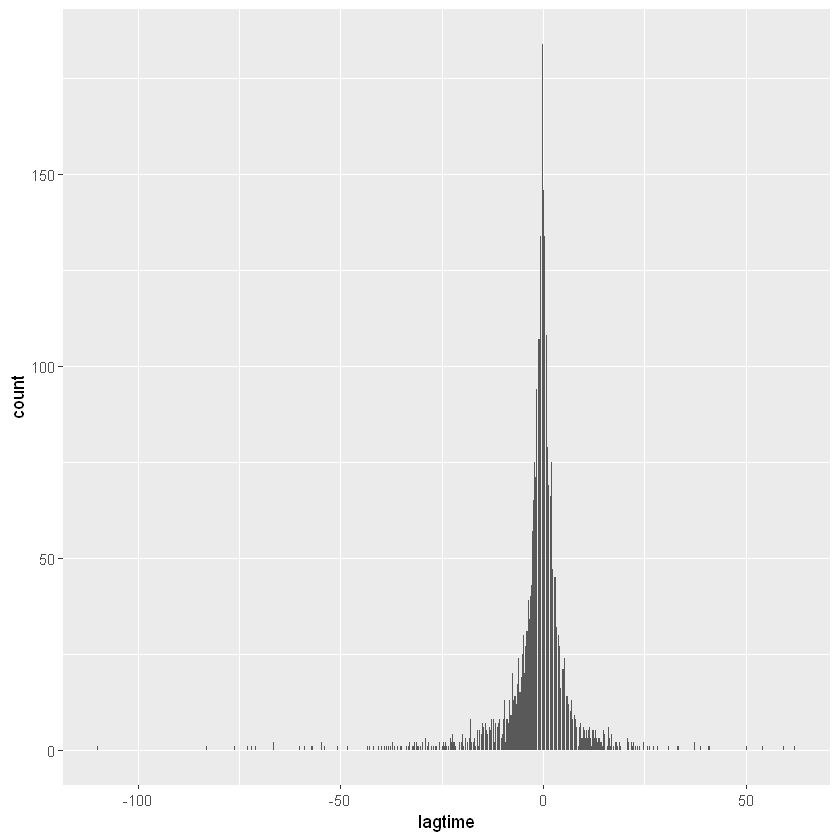

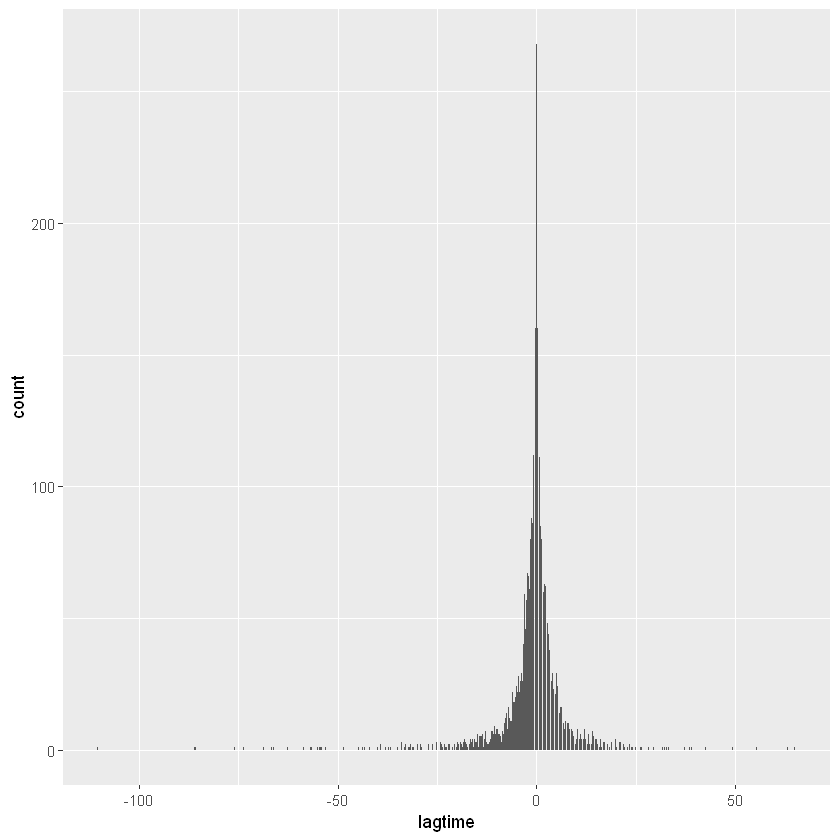

In [5]:
# Plot the distribution
library(ggplot2)
library(ggbeeswarm)

ggplot(df.lagtime,aes(type,lagtime)) +
 geom_boxplot() +
 geom_quasirandom(alpha = 0.2) +
 theme_bw()

# # Colored Histogram with Different Number of Bins
sub.lagtime = df.lagtime[df.lagtime$type=='onset',]
ggplot(sub.lagtime,aes(x=lagtime)) +
    geom_histogram(binwidth=0.2)

sub.lagtime = df.lagtime[df.lagtime$type=='offset',]
ggplot(sub.lagtime,aes(x=lagtime)) +
    geom_histogram(binwidth=0.2)

# hist(subTest$lagtime, breaks=seq(,,10),col="blue", xlim=c(-250,250), ylim=c(0,3000))
#, breaks=seq(-50,50,1), col="blue", xlim=c(-50,50), ylim=c(0,60))
# hist(subTest$lagtime, breaks=seq(-50,50,1), col="blue", xlim=c(-50,50), ylim=c(0,60))

# subTest = test[test$type=='offset',]
# hist(subTest$lagtime, breaks=seq(-50,50,1), col="blue", xlim=c(-50,50), ylim=c(0,60))


# ### (Option) Export a plot as EPS file ##############################################
# # Change the plot line
# setEPS()
# postscript("whatever.eps")
# plot(rnorm(100), main="Hey Some Data")
# dev.off()
# #####################################################################################


### 2-3. Test Coefficients of Variation from multiple samples
https://cran.r-project.org/web/packages/cvequality/vignettes/how_to_test_CVs.html

**Need to install packages**

`install.packages("ggbeeswarm")`<BR>
`install.packages("cvequality")`


In [39]:
install.packages("cvequality")

Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'cvequality' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpglcLq4\downloaded_packages


In [47]:
# Load required library
library(cvequality)

test1 <- with(df.lagtime,asymptotic_test(lagtime,type))
test1

$D_AD
[1] 3.795955

$p_value
[1] 0.05137655

In [48]:
test2 <- with(df.lagtime,mslr_test(nr = 1e4, lagtime,type))
test2

$MSLRT
[1] 178.8447

$p_value
[1] 0

---
# r-plotmaking
       20200501 am
#### Required package
- **Hmisc package**: Contains many functions useful for data analysis, high-level graphics, utility operations, functions for computing sample size and power, importing and annotating datasets, imputing missing values, advanced table making, variable clustering, character string manipulation, conversion of R objects to LaTeX and html code, and recoding variables.<BR> https://cran.r-project.org/web/packages/Hmisc/index.html

In [77]:
# Install packages
install.packages("Hmisc")

#load necessary libraries and packages
library(ggplot2)
library(Hmisc)
library(readxl)

Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'Hmisc' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Hmisc'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\User\Documents\R\win-library\3.6\00LOCK\Hmisc\libs\x64\Hmisc.dll to C:\Users\User\Documents\R\win-library\3.6\Hmisc\libs\x64\Hmisc.dll: Permission denied"
Warning message:
"restored 'Hmisc'"



The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmpau4RQf\downloaded_packages


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units




## 1. plotting LTP data using means and SEM

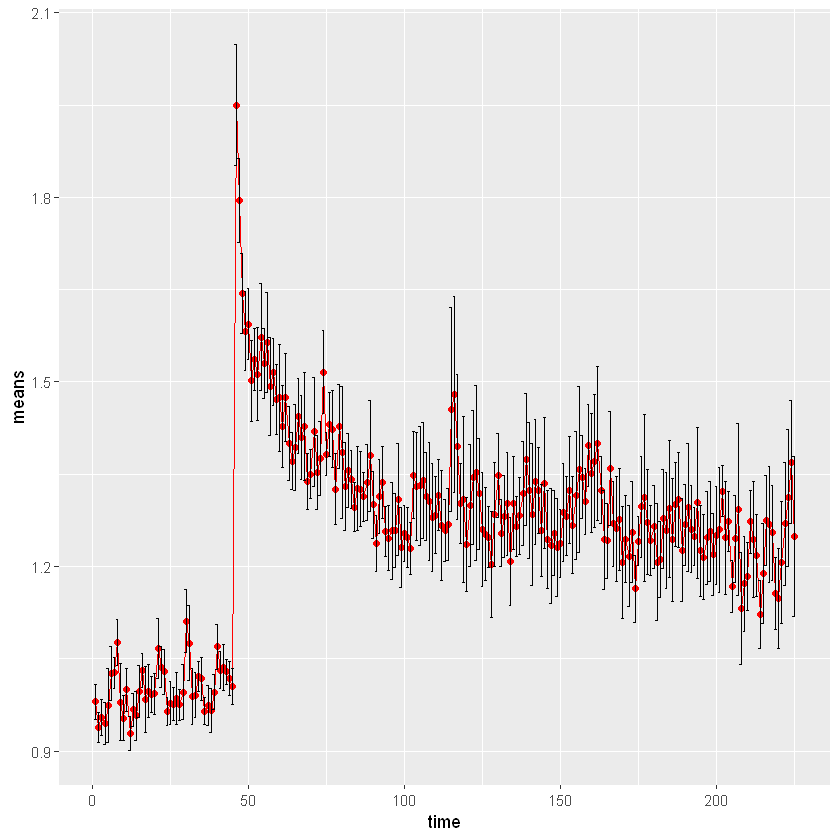

In [75]:
# 1. plotting LTP data using means and SEM

# 1-1. Read csv file named LTPtest
path = "C:/Users/User/Dropbox/Jupyter/alexei/r_plotmaking_data"
base = "LTPtest.csv"
filename = file.path(path, base)
LTP <- read.csv(filename)

# 1-2. Make line plot
p<-ggplot(LTP, aes(x=time, y=means))+geom_line(stat="identity",color="red") + geom_point(color="red") + geom_errorbar(aes(ymin=means-SEM, ymax=means+SEM))
print(p)

## 2. making dot plot with error bars using table with individual data points

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



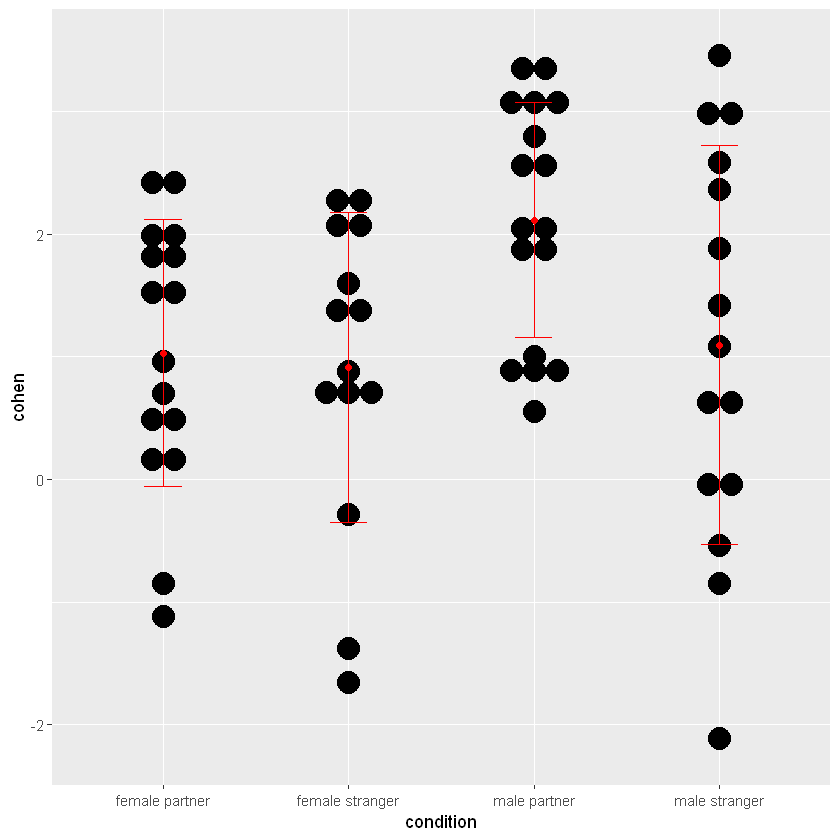

In [78]:
# 2. making dot plot with error bars using table with individual data points

# 2-1. import data from excel as df1 using "Import Dataset" function in Environment tab, one column containing datapoints, other columns containing independent variables
base = "synchfreeze_aggregated.xlsx"
filename = file.path(path, base)
df1 <- read_excel("C:/Users/User/Dropbox/Jupyter/alexei/r_plotmaking_data/synchfreeze_aggregated.xlsx", 
  sheet = "for Rplot")

# 2-2. plotting cohen distance with "condition" as factor
p <- ggplot(df1, aes(x=condition, y=cohen)) + 
  geom_dotplot(binaxis='y', stackdir='center')

p + stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), 
                 geom="errorbar", color="red", width=0.2) +
  stat_summary(fun.y=mean, geom="point", color="red")

## 3. plotting paired comparisons of freezing between mice tested alone or in pairs

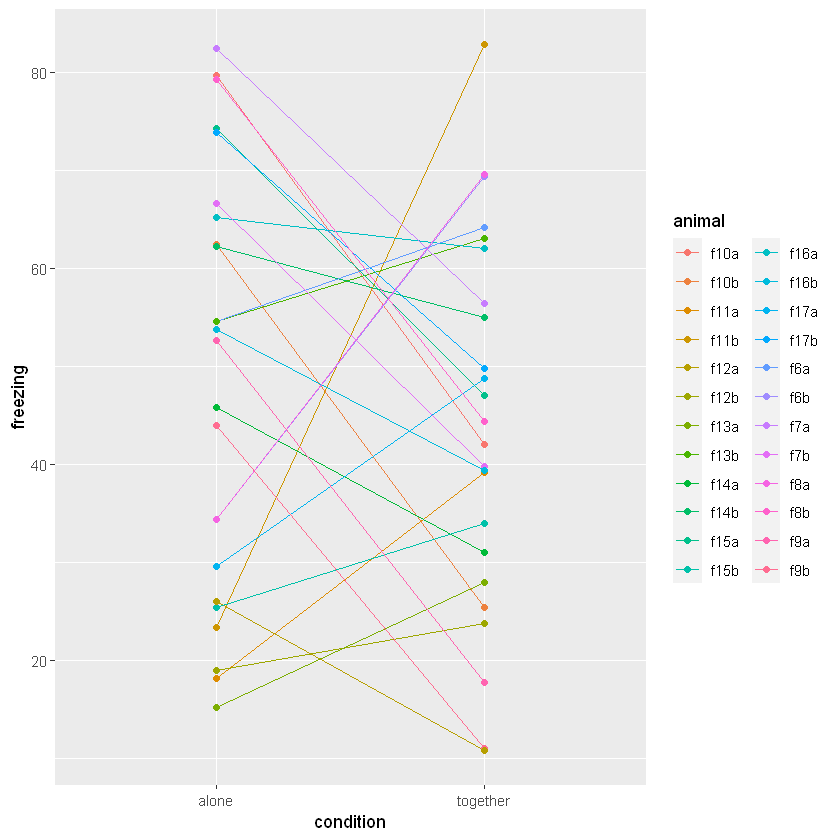

In [81]:
# 3. plotting paired comparisons of freezing between mice tested alone or in pairs

# 3-1. load excel file
# library(readxl)
base = "freezing_ind_vs_pair_for_Rplot.xlsm"
filename = file.path(path, base)
df1 <- read_excel(filename, sheet = "females")

# 3-2. plot pair comparisons
p<- ggplot(df1, aes(x=condition, y=freezing, group=animal, color=animal)) + 
  geom_line() + geom_point()
print(p)

## (Option) Export a plot as EPS file

In [82]:
### (Option) Export a plot as EPS file ##############################################
# Change the plot line
setEPS()
postscript("whatever.eps")
# plot(rnorm(100), main="Hey Some Data")
print(p)
dev.off()
#####################################################################################

png 
  2

---
# One-Sample Wilcoxon Signed Rank Test in R
http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r

In [61]:
# We want to know, if the average of the data differs from mu (two-tailed test).

# One-sample wilcoxon test
res <- wilcox.test(df.lagtime$V1, mu = 44)
# Printing the results
res

ERROR: Error in wilcox.test.default(df.lagtime$V1, mu = 44): 'x' must be numeric


---
# Boxplot for the distribution of lagtime for each animal pair.

In [ ]:
# Raw data for lag-time
# "s" stands for onset and "e" stands for offset of freezing
d1 <- c( 0,    -24,    3,    0,   16,    8,    9,   -3,    5,    4,   -3,   -1,  -2 )
e1 <- c("f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s") 

d2 <- c(   0,   -9,    0,    0,   13,    0,    0,    4,    2,   -1,   -8,   3)
e2 <- c("f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e") 

d3 <- c(14,-1,9,8,-7,0,-8,0,0,-18,0)
e3 <- c("f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s")

d4 <- c(     13,      10,      -3,     -11,      -9,       1,      -3,       3,     -18,      -6,       4,     0)
e4 <- c("f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e") 

d5 <- c(3,4,0,4,3,1,0,-8,-4,5,11)
e5 <- c("f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s")

d6 <- c(3,1,0,1,1,0,0,-9,-12,3,-2)
e6 <- c("f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e")

d7 <- c(-3,-1,-7,11,-11,3,-13,-2)
e7 <- c("f3_1s","f3_1s","f3_1s","f3_1s","f3_1s","f3_1s","f3_1s","f3_1s")

d8 <- c(-7,0,-2,2,-7,2,-6,0)
e8 <- c("f3_1e","f3_1e","f3_1e","f3_1e","f3_1e","f3_1e","f3_1e","f3_1e")

d9 <- c(3,-12,4,-2,5)
e9 <- c("f3_2s","f3_2s","f3_2s","f3_2s","f3_2s")

d10 <- c(-1,-3,0,-12)
e10 <- c("f3_2e","f3_2e","f3_2e","f3_2e")

d11 <- c(-11,-14,11,16,-57,19)
e11 <- c("f4_1s","f4_1s","f4_1s","f4_1s","f4_1s","f4_1s")

d12 <- c(-16,-10,-25,-1,0)
e12 <- c("f4_1e","f4_1e","f4_1e","f4_1e","f4_1e")

d13 <- c(3,-4,-18,18)
e13 <- c("f4_2s","f4_2s","f4_2s","f4_2s")

d14 <- c(8,3,-13,16,0)
e14 <- c("f4_2e","f4_2e","f4_2e","f4_2e","f4_2e")

# Concatenate the data
d <- c(d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14)
e <- c(e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14)

# Create data frame
mydata <- data.frame(d,e)
# Add column names
names(mydata) <- c("s1_s2","pair")

mydata

In [ ]:
# Boxplot for the distribution of lag-time
library(ggplot2)
library(ggbeeswarm)

ggplot(mydata,aes(pair,s1_s2)) + geom_boxplot() + geom_quasirandom(alpha = 0.9) + theme_bw()

### (Option) Export a plot as EPS file ##############################################
# Change the plot line
setEPS()
postscript("whatever.eps")
plot(rnorm(100), main="Hey Some Data")
dev.off()
#####################################################################################

---

# R version

In [ ]:
version

---
# Read csv file and test correlation
The csv file is generated by MATLAB code

[READING IN DATA FROM AN EXTERNAL FILE | R LEARNING MODULES](https://stats.idre.ucla.edu/r/modules/reading-in-data-from-an-external-file/)

In [ ]:
test <- read.table('D:\\wataru\\Recording_Analysis\\Bases_dmPFC-BLA\\2017-12-19_vm81a_base\\myFile.txt', sep = ",")

In [ ]:
ccf(test[,1], test[,3], lag = 200000, ylim = range(-1,1), type="correlation")

In [ ]:
testTS <- ts(test)

In [ ]:
length(testTS)
str(testTS)
class(testTS)
names(testTS)
testTS

In [ ]:
test <- read.table('D:\\wataru\\Recording_Analysis\\Bases_dmPFC-BLA\\2017-12-19_vm81a_base\\myFile.txt', sep = ",")

In [ ]:
data (sales)  # parts of Example 11.2.2 from Brockwell and Davies (1991).
sal <- diff (sales)
led <- diff(lead)
ccf (led, sal, lag = 20, ylim = range(-1,1), type="o")

In [ ]:
set.seed(123)
x = arima.sim(model=list(0.2, 0, 0.5), n = 100)
y = arima.sim(model=list(0.4, 0, 0.4), n = 100)
ccf(x, y, type="correlation")

In [ ]:
readClipboard()

In [ ]:
# setwd("D:/wataru/Recording_Analysis/Bases_dmPFC-BLA")
# theta <- scan('test.txt')
# plot(theta)

theta <- scan('D:\\wataru\\Recording_Analysis\\Bases_dmPFC-BLA\\2017-12-19_vm81a_base\\test.txt')
plot(theta)

---
# Data Types
https://www.statmethods.net/input/datatypes.html

In [ ]:
######################################################
# vectors
a <- c(1,2,5.3,6,-2,4) # numeric vector
b <- c("one","two","three") # character vector
c <- c(TRUE,TRUE,TRUE,FALSE,TRUE,FALSE) #logical vector

# Identify rows, columns or elements using subscripts.
a[4]
a[c(2,4)]

######################################################
# matrix
# generates 5 x 4 numeric matrix 
y<-matrix(1:20, nrow=5,ncol=4)
# another example
cells <- c(1,26,24,68)
rnames <- c("R1", "R2")
cnames <- c("C1", "C2") 
mymatrix <- matrix(cells, nrow=2, ncol=2, byrow=TRUE,
  dimnames=list(rnames, cnames))

# Identify rows, columns or elements using subscripts.
x[,4] # 4th column of matrix
x[3,] # 3rd row of matrix 
x[2:4,1:3] # rows 2,3,4 of columns 1,2,3

######################################################
# Data Frames
# A data frame is more general than a matrix, in that different columns can have different
# modes (numeric, character, factor, etc.). This is similar to SAS and SPSS datasets.

d <- c(1,2,3,4)
e <- c("red", "white", "red", NA)
f <- c(TRUE,TRUE,TRUE,FALSE)
mydata <- data.frame(d,e,f)
names(mydata) <- c("ID","Color","Passed") # variable names

# Identify rows, columns or elements using subscripts.
mydata[2:3] # columns 3,4,5 of data frame
mydata[c("ID","Passed")] # columns ID and Age from data frame
mydata$Color # variable x1 in the data frame
mydata[1,3]

######################################################
# The ls() function returns a vector listing lists all the objects (vectors, data frames, etc) in your current workspace.
ls()

# Remove these three objects
rm("first_name", "last_name", "new_df")
 
# Or remove objects listed in a vector
rm(list = c("first_name", "last_name", "new_df"))
 
# Or remove all files from your workspace
rm(list = ls())
 
# Or remove vectors programmatically.  Delete objects with underscore in name
rm(list = ls()[grepl("_", ls())])

######################################################
# Lists
# An ordered collection of objects (components). A list allows you to gather a variety of 
# (possibly unrelated) objects under one name.
# example of a list with 4 components - 
# a string, a numeric vector, a matrix, and a scaler 

w <- list(name="Fred", mynumbers=a, mymatrix=y, age=5.3)

# example of a list containing two lists
# It looks concatenate the two lists
v <- c(w,w)

# Identify elements of a list using the [[]] convention.
mylist[[2]] # 2nd component of the list
mylist[["mynumbers"]] # component named mynumbers in list



######################################################
# Factors
# Tell R that a variable is nominal by making it a factor. The factor stores the nominal
# values as a vector of integers in the range [ 1... k ] (where k is the number of unique 
# values in the nominal variable), and an internal vector of character strings (the original 
# values) mapped to these integers.

# variable gender with 20 "male" entries and 
# 30 "female" entries 
gender <- c(rep("male",20), rep("female", 30)) 
gender <- factor(gender) 
# stores gender as 20 1s and 30 2s and associates
# 1=female, 2=male internally (alphabetically)
# R now treats gender as a nominal variable 
summary(gender)
